<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/Maximum_A_Posteriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maximum a Posteriori Estimation [13]

* Maximum Likelihood is a special example of Maximum A Posterior estimation.

* MLE produces a point estimate that maximizes the Least Likelihood function of the unknown parameters given observations

* ***Maximum A Posterior is a generalized case of Maximum Likelihood Estimation***. It also produces a point estimate, which is the mode of the posterior distribution of the parameters.

* Maximum a Posteriori can be used when we have some prior knowledge. Then using evidence we can modify our belief and obtain a posterior probability. By doing this, we are actually dragging our estimation towards our prior belief. However, the effects of priors will be gone with increasing data.

In [ ]:
#import libraries
import numpy as np
from scipy.stats import norm, invgamma
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 8)
import scipy as sp

Let us take the *coin toss* example to better understand Maximum a posteriori estimation.


Suppose that we have a coin but we do not know if it is fair not. In other words, we have no idea whether the probability of getting head (H) is the same as tail (T). In this case, how can we estimate such probability?

A natural way to do this is to flip this coin for several times to see how many H’s and T’s do we have.

* $X$: a random variable that represents the coin toss outcome (1 for H and 0 for T)
* $\Theta$ : the probability of getting H

Assuming a random theta, we are going to use random number generator to get some samples and see what the data is like.

In [ ]:
n = 10 #no. of coin flips
theta = 0.7
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=10)
X_arr

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

$\boldsymbol{\hat{\theta}}$ = $\frac{8}{10}$ = $0.8$

Intuitively, we get 0.8. MLE states that is our best guess (techinically, estimation) for $\theta$ based on observations we have.

In [ ]:
X_arr = np.ones(n)
X_arr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

If our data looks like this, the MLE would be simply nh/n = 0/10 = 0. However, it doesn't make sense. It should be closer to 0.5 (not neccesarily). Therefore we can introduce a **prior** here that drags our est. to the prior belief (prior effects will be gone with increasing data).

$\boldsymbol{\hat{\theta}}_{map}$ = $argmax_{\theta} logp(\theta|x)$ = $argmax_{\theta} logp(x|\theta) + logp(\theta)$

$Logp(\theta)$ = $Log$ $constant$, when we have a uniform prior.

In [ ]:
#hyperparameters: alpha and beta, pseudo counts that smooth the posterior distribution.

For example, we assume there are
$\alpha$
 successes and
$\beta$
 failures before any data is given. In our example of all 1’s, MAP will drag the MLE estimate of
0
 towards our prior belief, that it is probably NOT true that a coin toss will always give a head.

In [ ]:
#defining our prior distribution with hyperparameters alpha and beta
alpha = beta = 2
theta = 0.7
n = 50
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
sum(X_arr) /  X_arr.size

0.58

posterior is updated as
Beta
$(\alpha+x_i, \beta+1−x_i)$ with every input data $x_i$.

In [ ]:
beta_arr = np.asarray([[alpha+sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(X_arr.size)])
beta_arr = np.insert(beta_arr, 0, [alpha, beta], 0)

In [ ]:
beta_X = np.linspace(0, 1, 1000)

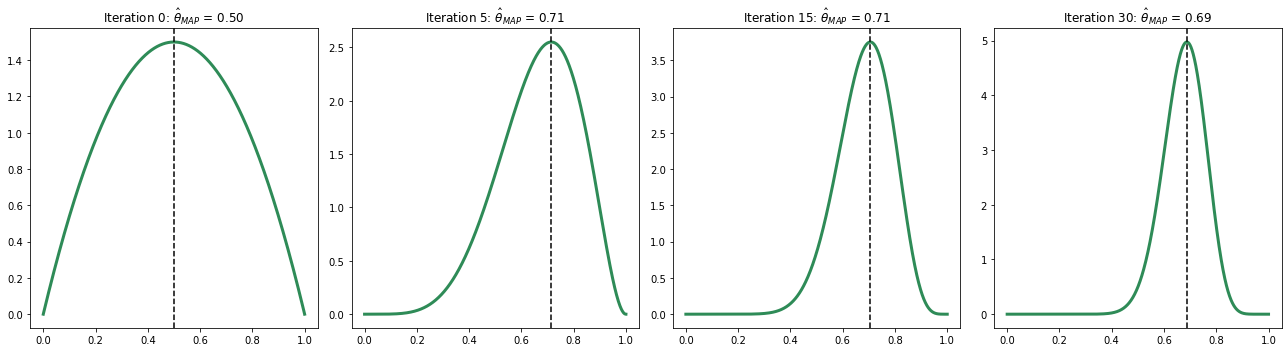

In [ ]:
my_color = '#2E8B57'
fig, ax_arr = plt.subplots(ncols=4, figsize=(18,5), sharex=True)
for i, iter_ in enumerate([0, 5, 15, 30]):
    ax = ax_arr[i]
    a, b = beta_arr[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

We note that while this example shows that MAP can give us a whole posterior distribution for parameter θ, the goal of MAP is still to get a point estimate.

This simplified example is easy because we can solve this problem analytically thanks to conjugacy.